In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("nps.csv")

In [3]:
dataset.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [4]:
del dataset

In [7]:
dataset=pd.read_csv("nps.csv",parse_dates=["event_date"])

In [8]:
dataset.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


detractors=(0-6)
passives =(7-8)
promoters=(9-10)


In [10]:
sorted(dataset.score.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [11]:
dataset.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [12]:
dataset["year"]=dataset.event_date.dt.year

In [13]:
dataset["month"]=dataset.event_date.dt.month

In [14]:
dataset["day"]=dataset.event_date.dt.day

In [15]:
dataset

,event_date,user_id,score,year,month,day
0,2020-01-01 19:00:51,290067447,8,2020,1,1
1,2020-01-02 17:34:43,223014806,10,2020,1,2
2,2020-01-02 19:11:55,187864388,10,2020,1,2
3,2020-01-02 19:27:00,318758952,8,2020,1,2
4,2020-01-02 21:42:19,189933311,0,2020,1,2
...,...,...,...,...,...,...
3321,2020-12-30 21:24:28,289219785,8,2020,12,30
3322,2020-12-31 02:01:19,187133285,7,2020,12,31
3323,2020-12-31 05:30:00,202035502,10,2020,12,31
3324,2020-12-31 06:12:32,196225609,10,2020,12,31


In [17]:
dataset["yearmonth"]=dataset.year*100+dataset.month

In [19]:
dataset.head()

,event_date,user_id,score,year,month,day,yearmonth
0,2020-01-01 19:00:51,290067447,8,2020,1,1,202001
1,2020-01-02 17:34:43,223014806,10,2020,1,2,202001
2,2020-01-02 19:11:55,187864388,10,2020,1,2,202001
3,2020-01-02 19:27:00,318758952,8,2020,1,2,202001
4,2020-01-02 21:42:19,189933311,0,2020,1,2,202001


In [21]:
dataset.score.value_counts()

10    1532
8      618
9      513
7      294
6      118
5       97
0       53
3       40
2       26
4       25
1       10
Name: score, dtype: int64

In [27]:
def category(score):
    """returns nps category"""
    if score in range (0,7):
        return "detaractors"
    elif score in (7,8):
        return "passive"
    elif score in (9,10):
        return "promoter"

In [28]:
category(8)

'passive'

In [29]:
dataset["categories"]=dataset.score.map(category)

In [30]:
dataset.head()

,event_date,user_id,score,year,month,day,yearmonth,categories
0,2020-01-01 19:00:51,290067447,8,2020,1,1,202001,passive
1,2020-01-02 17:34:43,223014806,10,2020,1,2,202001,promoter
2,2020-01-02 19:11:55,187864388,10,2020,1,2,202001,promoter
3,2020-01-02 19:27:00,318758952,8,2020,1,2,202001,passive
4,2020-01-02 21:42:19,189933311,0,2020,1,2,202001,detaractors


In [54]:
nps=dataset.pivot_table(index="yearmonth",columns="categories",aggfunc="size")

In [55]:
nps["total_responses"]=nps.sum(axis=1)

promoters-detractots/total responses

In [56]:
nps

categories,detaractors,passive,promoter,total_responses
yearmonth,,,,
202001,31,82,215,328
202002,22,90,161,273
202003,33,72,125,230
202004,36,87,178,301
202005,33,83,191,307
202006,32,80,215,327
202007,48,95,258,401
202008,40,103,256,399
202009,18,68,135,221


In [66]:
nps["nps"]=(nps.promoter-nps.detaractors)/nps.total_responses

In [67]:
nps["nps"]=round(nps.nps*100).astype(int)

In [68]:
nps

categories,detaractors,passive,promoter,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,56
202002,22,90,161,273,51
202003,33,72,125,230,40
202004,36,87,178,301,47
202005,33,83,191,307,51
202006,32,80,215,327,56
202007,48,95,258,401,52
202008,40,103,256,399,54
202009,18,68,135,221,53


In [75]:
nps.index

Int64Index([202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
            202009, 202010, 202011, 202012],
           dtype='int64', name='yearmonth')

Text(0.5, 0, '')

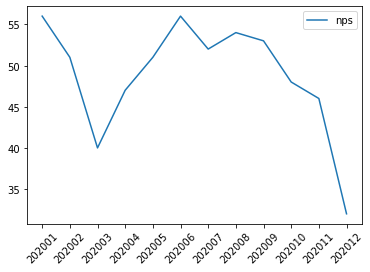

In [78]:
ax=nps.reset_index().plot(kind='line',x="yearmonth",y="nps")
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index,rotation=45)
ax.set_xlabel("")